In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

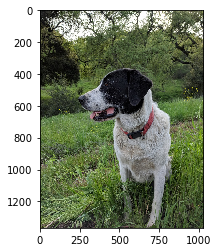

In [9]:
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, code=cv2.COLOR_BGR2RGB)
plt.imshow(full)

&lt;matplotlib.image.AxesImage at 0x1ca46a58fd0&gt;

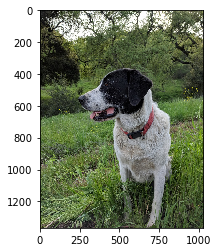

In [3]:
plt.imshow(full)

&lt;matplotlib.image.AxesImage at 0x1ca46c31240&gt;

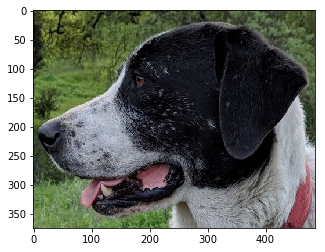

In [4]:
face = cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face, code=cv2.COLOR_BGR2RGB)
plt.imshow(face)

In [5]:
full.shape

(1367, 1025, 3)

In [6]:
sum([1 ,2, 3])

6

In [7]:
string = 'sum'

In [9]:
string([1, 2, 3]) #error

TypeError: &#39;str&#39; object is not callable

In [10]:
eval(string)

&lt;function sum(iterable, start=0, /)&gt;

In [14]:
myfunction = eval(string)

In [15]:
type(myfunction)

builtin_function_or_method

In [17]:
myfunction([1, 2, 3])

6

In [19]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

&lt;matplotlib.image.AxesImage at 0x1ca463e67f0&gt;

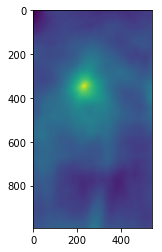

In [22]:
method = eval('cv2.TM_CCOEFF')
copy_full = full.copy()
result = cv2.matchTemplate(copy_full, face, method)
plt.imshow(result) #Heatmap

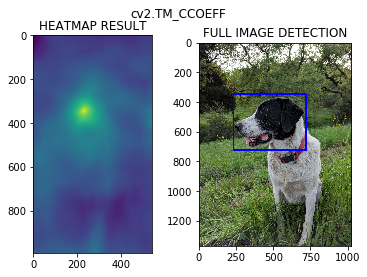

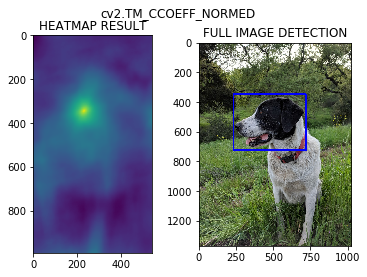

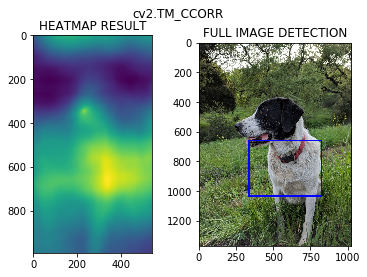

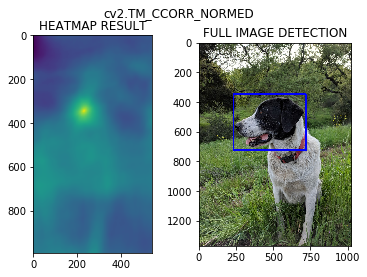

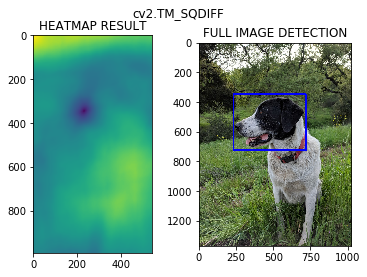

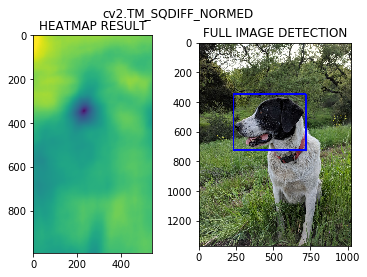

In [24]:
for m in methods:
    # CREATE COPY
    copy_full = full.copy()
    #CREATE FUNCTION FROM METHODES LIST
    method = eval(m)
    
    result = cv2.matchTemplate(copy_full, face, method)
    min_val, max_val, min_location, max_location = cv2.minMaxLoc(result)

    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_location
    else:
        top_left = max_location
    
    heigth, width, channels = face.shape

    bottom_right = (top_left[0] + width, top_left[1] + heigth)

    cv2.rectangle(copy_full, top_left, bottom_right, color=(0,0,255), thickness=10)

    #plot and show the images
    plt.subplot(121)
    plt.imshow(result)
    plt.title('HEATMAP RESULT')

    plt.subplot(122)
    plt.imshow(copy_full)
    plt.title('FULL IMAGE DETECTION')

    plt.suptitle(m)

    plt.show()

    print('\n')
    print('\n')


In [25]:
# Corner detection 

&lt;matplotlib.image.AxesImage at 0x1ca469b4d68&gt;

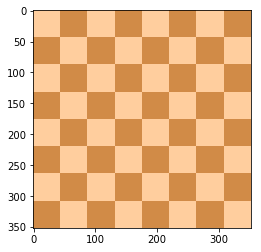

In [28]:
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)
plt.imshow(flat_chess)

&lt;matplotlib.image.AxesImage at 0x1ca46754d68&gt;

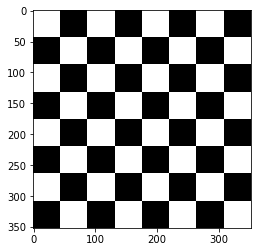

In [50]:
gray_flat_chess = cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess, cmap='gray')

&lt;matplotlib.image.AxesImage at 0x1ca475ca2b0&gt;

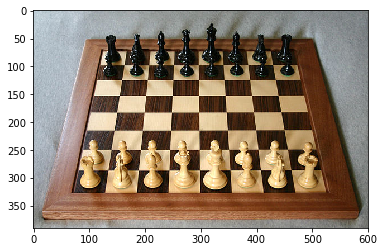

In [49]:
real_chess = cv2.imread('../DATA/real_chessboard.jpg')
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

&lt;matplotlib.image.AxesImage at 0x1ca4661a588&gt;

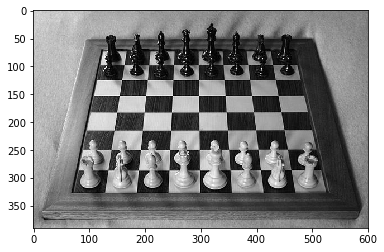

In [37]:
gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess, cmap='gray')

In [38]:
gray_flat_chess

array([[197, 197, 197, ..., 127, 127, 127],
       [197, 197, 197, ..., 127, 127, 127],
       [197, 197, 197, ..., 127, 127, 127],
       ...,
       [127, 127, 127, ..., 197, 197, 197],
       [127, 127, 127, ..., 197, 197, 197],
       [127, 127, 127, ..., 197, 197, 197]], dtype=uint8)

In [51]:
gray = np.float32(gray_flat_chess)

In [52]:
gray # now is float, with floatingpoint numbers

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]], dtype=float32)

In [53]:
destination = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04 )

In [54]:
destination = cv2.dilate(destination, None)

&lt;matplotlib.image.AxesImage at 0x1ca476d8d68&gt;

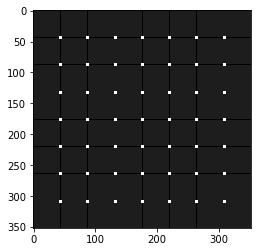

In [58]:
plt.imshow(destination, cmap='gray')

In [56]:
flat_chess[destination>0.01*destination.max()] = [255,0,0] #RGB

&lt;matplotlib.image.AxesImage at 0x1ca476ab4a8&gt;

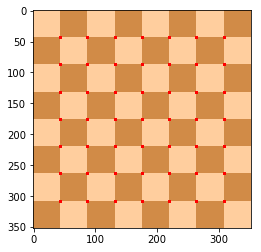

In [57]:
plt.imshow(flat_chess)

In [59]:
gray = np.float32(gray_real_chess)
gray

array([[210., 204., 202., ..., 119., 119., 124.],
       [203., 200., 199., ..., 118., 116., 117.],
       [213., 214., 212., ..., 130., 128., 128.],
       ...,
       [120., 131., 144., ..., 115., 119., 118.],
       [124., 143., 153., ..., 111., 112., 107.],
       [135., 155., 156., ..., 113., 113., 107.]], dtype=float32)

In [60]:
destination = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
destination = cv2.dilate(destination, None)
real_chess[destination>0.01*destination.max()] = [255,0,0]

&lt;matplotlib.image.AxesImage at 0x1ca496a25f8&gt;

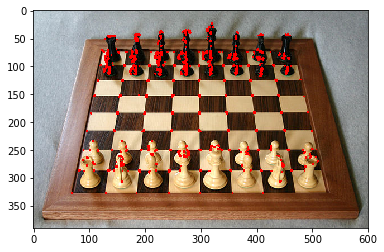

In [61]:
plt.imshow(real_chess)

In [62]:
# SHI TOMASI Corner detection

In [17]:
# Need to reset the images since we drew on them
flat_chess = cv2.imread('../DATA/flat_chessboard.png')
flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess = cv2.cvtColor(flat_chess,cv2.COLOR_BGR2GRAY)

In [40]:
corners = cv2.goodFeaturesToTrack(image=gray_flat_chess,maxCorners=100,qualityLevel=0.01, minDistance=10)

In [41]:
corners

array([[[308., 308.]],

       [[264., 308.]],

       [[220., 308.]],

       [[176., 308.]],

       [[132., 308.]],

       [[ 88., 308.]],

       [[ 44., 308.]],

       [[308., 264.]],

       [[264., 264.]],

       [[220., 264.]],

       [[176., 264.]],

       [[132., 264.]],

       [[ 88., 264.]],

       [[ 44., 264.]],

       [[308., 220.]],

       [[264., 220.]],

       [[220., 220.]],

       [[176., 220.]],

       [[132., 220.]],

       [[ 88., 220.]],

       [[ 44., 220.]],

       [[308., 176.]],

       [[264., 176.]],

       [[220., 176.]],

       [[176., 176.]],

       [[132., 176.]],

       [[ 88., 176.]],

       [[ 44., 176.]],

       [[308., 132.]],

       [[264., 132.]],

       [[220., 132.]],

       [[176., 132.]],

       [[132., 132.]],

       [[ 88., 132.]],

       [[ 44., 132.]],

       [[308.,  88.]],

       [[264.,  88.]],

       [[220.,  88.]],

       [[176.,  88.]],

       [[132.,  88.]],

       [[ 88.,  88.]],

       [[ 44.,  

In [42]:
corners = np.int0(corners)
corners

array([[[308, 308]],

       [[264, 308]],

       [[220, 308]],

       [[176, 308]],

       [[132, 308]],

       [[ 88, 308]],

       [[ 44, 308]],

       [[308, 264]],

       [[264, 264]],

       [[220, 264]],

       [[176, 264]],

       [[132, 264]],

       [[ 88, 264]],

       [[ 44, 264]],

       [[308, 220]],

       [[264, 220]],

       [[220, 220]],

       [[176, 220]],

       [[132, 220]],

       [[ 88, 220]],

       [[ 44, 220]],

       [[308, 176]],

       [[264, 176]],

       [[220, 176]],

       [[176, 176]],

       [[132, 176]],

       [[ 88, 176]],

       [[ 44, 176]],

       [[308, 132]],

       [[264, 132]],

       [[220, 132]],

       [[176, 132]],

       [[132, 132]],

       [[ 88, 132]],

       [[ 44, 132]],

       [[308,  88]],

       [[264,  88]],

       [[220,  88]],

       [[176,  88]],

       [[132,  88]],

       [[ 88,  88]],

       [[ 44,  88]],

       [[308,  44]],

       [[264,  44]],

       [[220,  44]],

       [[1

In [43]:
for i in corners:
    x, y = i.ravel()
    print(x)
    print(y)

308
308
264
308
220
308
176
308
132
308
88
308
44
308
308
264
264
264
220
264
176
264
132
264
88
264
44
264
308
220
264
220
220
220
176
220
132
220
88
220
44
220
308
176
264
176
220
176
176
176
132
176
88
176
44
176
308
132
264
132
220
132
176
132
132
132
88
132
44
132
308
88
264
88
220
88
176
88
132
88
88
88
44
88
308
44
264
44
220
44
176
44
132
44
88
44
44
44


In [44]:
for i in corners:
    x, y = i.ravel()
    cv2.circle(flat_chess, center=(x, y), radius=5, color=(255,0,0), thickness=3)

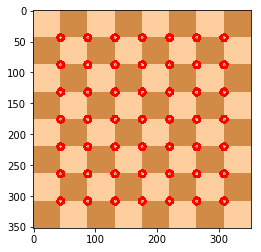

In [45]:
plt.imshow(flat_chess)

In [46]:
import cv2
import time
import numpy as np

capture = cv2.VideoCapture(0)

width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

while True:
    ret, frame = capture.read()

    corners = cv2.goodFeaturesToTrack(image=frame, maxCorners=5, qualityLevel=0.01, minDistance=10)
    corners = np.int0(corners)

    for i in corners:
        x, y = i.ravel()
        cv2.circle(frame, center=(x, y), radius=5, color=(255,0,0), thickness=3)

        cv2.imshow('video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
capture.release()
cv2.destroyAllWindows()

error: OpenCV(3.4.2) C:\Miniconda3\conda-bld\opencv-suite_1534379934306\work\modules\imgproc\src\corner.cpp:269: error: (-215:Assertion failed) src.type() == (((0) & ((1 << 3) - 1)) + (((1)-1) << 3)) || src.type() == (((5) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function 'cv::cornerEigenValsVecs'
